In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/paperspace/fastai/old')
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = '/home/paperspace/data/PollenDataset'
sz = 128

In [4]:
import csv
orig_label_csv = f"{PATH}/pollen_data.csv"
r = csv.reader(open(orig_label_csv))

label_csv = f"{PATH}/clean_pollen_data.csv"
w = csv.writer(open(label_csv, "w"))
w.writerows((row[1:] for row in r))

In [5]:
assert(torch.cuda.is_available())
assert(torch.backends.cudnn.enabled)

714
(300, 180, 3)


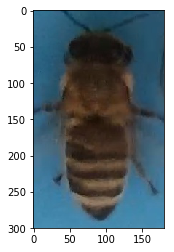

In [6]:
files = os.listdir(f"{PATH}/images")
print(len(files))
img = plt.imread(f"{PATH}/images/{files[random.randint(0, len(files)-1)]}")
plt.imshow(img)
print(img.shape)

In [7]:
n = len(list(open(label_csv))) - 1
# Get 20% of indices
val_idxs = get_cv_idxs(n,  val_pct=0.2)

In [8]:
label_df = pd.read_csv(label_csv)
label_df.head()

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0


In [9]:
label_df.pivot_table(index="pollen_carrying", aggfunc=len)

,filename
pollen_carrying,
0,202
1,233


In [10]:
arch = resnet34
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'images', label_csv, bs=16,
                                    tfms=tfms, val_idxs=val_idxs)

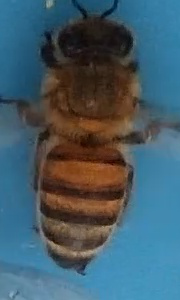

In [11]:
idx = random.randint(0, len(data.trn_ds.fnames)-1)
fn = f"{PATH}/{data.trn_ds.fnames[idx]}"
img = PIL.Image.open(fn)
img

In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=False)

 86%|████████▋ | 19/22 [00:02<00:00,  7.45it/s, loss=1.12] 


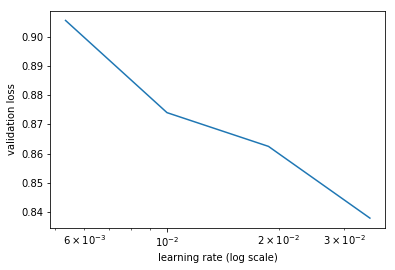

In [13]:
learn.lr_find()
learn.sched.plot()

In [14]:
learn.unfreeze()
lr = np.array([1e-4, 1e-3, 1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.669695   0.380183   0.827586  
    1      0.557454   0.267856   0.873563                  
    2      0.416972   0.370219   0.885057                  
    3      0.383856   0.316523   0.862069                  
    4      0.37495    0.363581   0.850575                  
    5      0.309388   0.422514   0.862069                  
    6      0.258953   0.283933   0.850575                  
    7      0.233768   0.207705   0.931034                  
    8      0.229539   0.20403    0.931034                  
    9      0.193871   0.253336   0.908046                  
    10     0.166679   0.250933   0.908046                  
    11     0.147107   0.244966   0.91954                   
    12     0.148044   0.233908   0.91954                   



[array([0.23391]), 0.9195402305701683]